# Using the EEG data you downloaded

To use the data you just downloaded, simply import it in the same way you import anything else in python. Check out the `data` folder to find out how the data is structured - it works in a hierarchical way.

For example, to use your EEG data, you can import it in the following way:

In [1]:
from data.eeg.preprocessed.resting_state import raws

The imported object is a __generator__ that you can loop over. Whenever the next value is requested (i.e. on each loop iteration), the `raws` function loads the next raw dataset, and produces an `MNE-python` raw data structure that you can then proceed to use.

Just to show what that's like, you can try out the following, which just produces 1 iteration:

In [3]:
next(raws())

Creating RawArray with float64 data, n_channels=111, n_times=175062
    Range : 0 ... 175061 =      0.000 ...   350.122 secs
Ready.


<RawArray  |  None, n_channels x n_times : 111 x 175062 (350.1 sec), ~148.5 MB, data loaded>

You can equally get the data in `mne.Epochs`, so divided based on the input. You can pass any keyword arguments you want to the `epochs()` generator, which will pass them on to `mne.Epochs`, so you can still specifiy baselines or other stuff if you want.

The way this deals with tasks split across multiple recordings is it will concatenate them all for you.

An example where this would be appropriate is the surround-suppression paradigm:

Creating RawArray with float64 data, n_channels=111, n_times=144564
    Range : 0 ... 144563 =      0.000 ...   289.126 secs
Ready.
Creating RawArray with float64 data, n_channels=111, n_times=144564
    Range : 0 ... 144563 =      0.000 ...   289.126 secs
Ready.
64 matching events found
0 projection items activated
64 matching events found
0 projection items activated
NDARCX221CWA
Loading data for 64 events and 351 original time points ...
0 bad epochs dropped
Loading data for 64 events and 351 original time points ...
0 bad epochs dropped
128 matching events found
0 bad epochs dropped


/Library/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


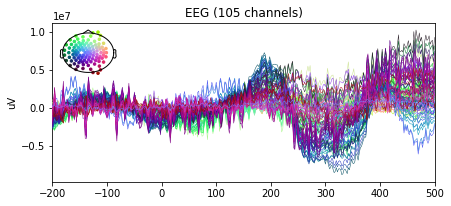

In [11]:
from data.eeg.preprocessed.surround_suppression import epochs

epoch = next(epochs(tmin=-0.2, tmax=0.5, baseline=(-0.2, 0)))

epoch.average().plot(spatial_colors=True);